# DeepTile Demo

## Imports

In [1]:
import deeptile
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from deeptile.extensions import segmentation
from deeptile.extensions import stitch
matplotlib.rcParams['figure.dpi'] = 300

## Example: TIFF

In [2]:
# Create DeepTile object
dt = deeptile.load('sample_images/sample.tif')

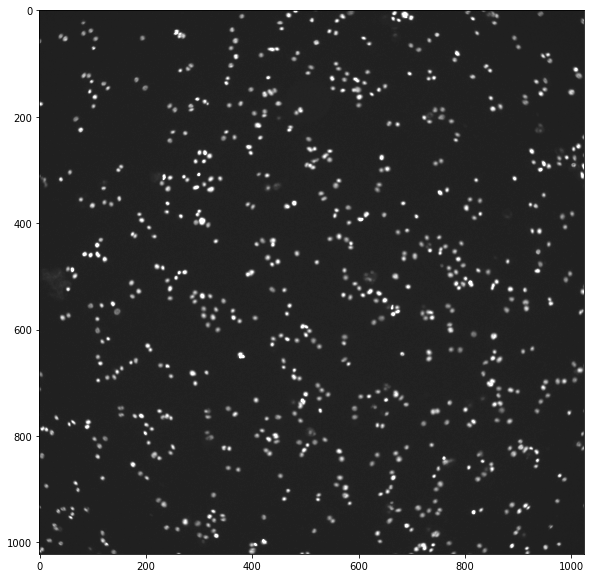

In [3]:
# Show the image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dt.image, vmin=0, vmax=4000, cmap='gray')

In [4]:
# Configure
tile_size = (300, 300)
overlap = (0.1, 0.1)

In [5]:
# Get tiles
tiles = dt.get_tiles(tile_size, overlap)
tiles = tiles.pad()

In [6]:
# Individual tile
tiles[0, 0]

dask.array<getitem, shape=(300, 300), dtype=uint16, chunksize=(300, 300), chunktype=numpy.ndarray>

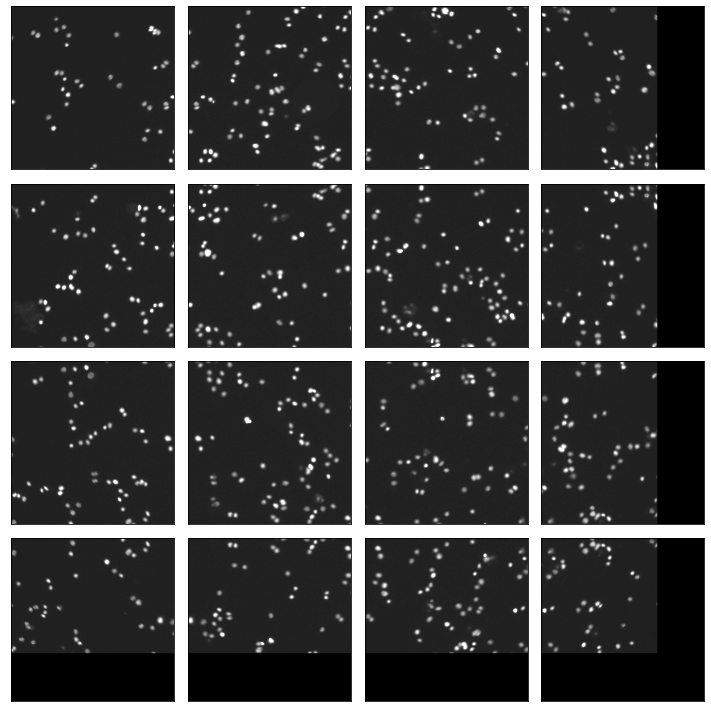

In [7]:
# Show the tiles
fig, ax = plt.subplots(tiles.shape[0], tiles.shape[1], figsize=(10, 10))
for (i, j), tile in np.ndenumerate(tiles):
    ax[i, j].imshow(tile, vmin=0, vmax=4000, cmap='gray')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
plt.tight_layout()

In [8]:
# Segment tiles and stitch

model_parameters = {'gpu': True, 'model_type': 'nuclei'}
eval_parameters = {'diameter': 10}
cellpose = segmentation.cellpose_segmentation(model_parameters, eval_parameters)

masks = cellpose(tiles)
mask = stitch.stitch_masks(masks)

2022-08-17 17:02:11,041 [INFO] WRITING LOG OUTPUT TO /home/wniu/.cellpose/run.log
2022-08-17 17:02:13,081 [INFO] ** TORCH CUDA version installed and working. **
2022-08-17 17:02:13,082 [INFO] >>>> using GPU
2022-08-17 17:02:13,082 [INFO] >> nuclei << model set to be used
2022-08-17 17:02:13,138 [INFO] >>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
2022-08-17 17:02:13,190 [INFO] ~~~ FINDING MASKS ~~~
2022-08-17 17:02:13,274 [INFO] >>>> TOTAL TIME 0.08 sec
2022-08-17 17:02:13,276 [INFO] ~~~ FINDING MASKS ~~~
2022-08-17 17:02:13,345 [INFO] >>>> TOTAL TIME 0.07 sec
2022-08-17 17:02:13,347 [INFO] ~~~ FINDING MASKS ~~~
2022-08-17 17:02:13,416 [INFO] >>>> TOTAL TIME 0.07 sec
2022-08-17 17:02:13,418 [INFO] ~~~ FINDING MASKS ~~~
2022-08-17 17:02:13,483 [INFO] >>>> TOTAL TIME 0.07 sec
2022-08-17 17:02:13,485 [INFO] ~~~ FINDING MASKS ~~~
2022-08-17 17:02:13,553 [INFO] >>>> TOTAL TIME 0.07 sec
2022-08-17 17:02:13,555 [INFO] ~~~ FINDING MASKS ~~~
2022-08-17 17:02:13,623

In [9]:
# Data structures
print(mask.shape)
print(masks.shape)
print(tiles.shape)

(1022, 1024)
(4, 4)
(4, 4)


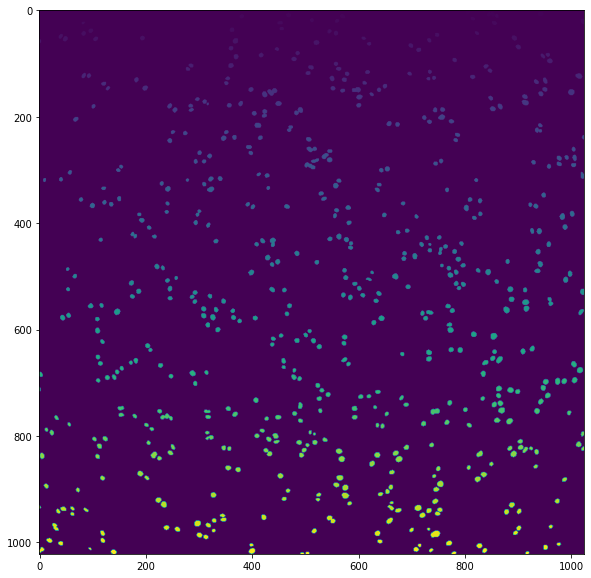

In [10]:
# Show the stitched mask
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mask)